In [1]:
from matplotlib import pyplot
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import time

from L3.zad1 import generate_data
from L3.k_means import KMeans

a)

In [2]:

def plot(number, dimension, distributions_number, probabilities, mi, sigma):
    data = generate_data(number, dimension, distributions_number, probabilities, mi, sigma)
    
    partition = KMeans(k=5).fit(data)
    print("Group sizes: ", partition.groups_sizes())
    colormap = "cmyrg"
    pyplot.scatter(*data.T, c=[colormap[i] for i in partition.groups], alpha=0.5)
    pyplot.scatter(*partition.group_centers.T, c="k")
    pyplot.show()

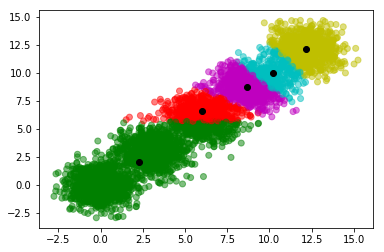

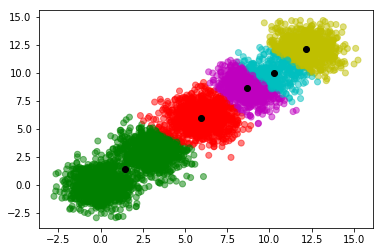

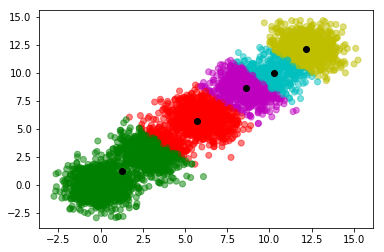

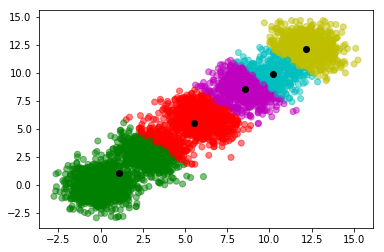

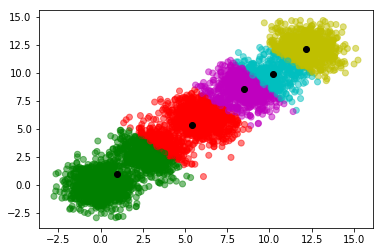

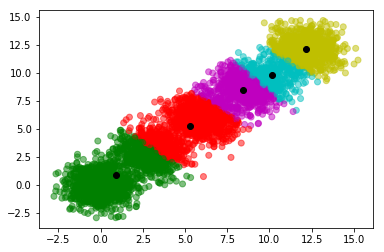

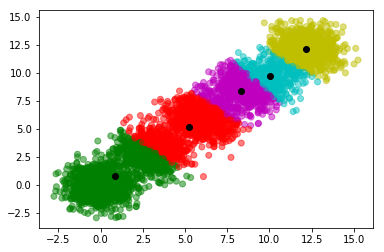

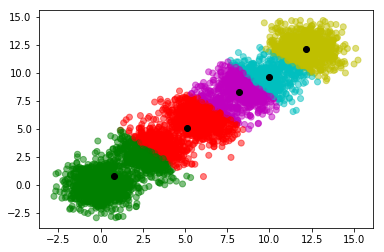

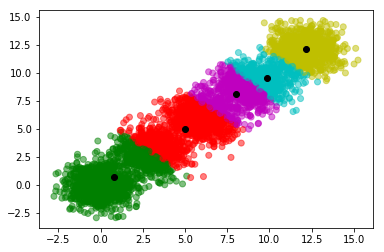

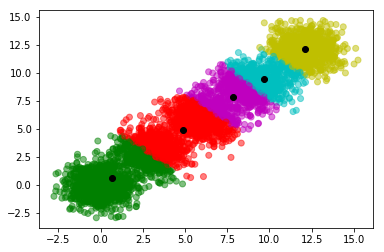

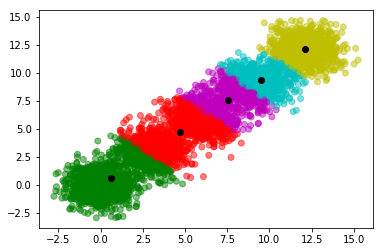

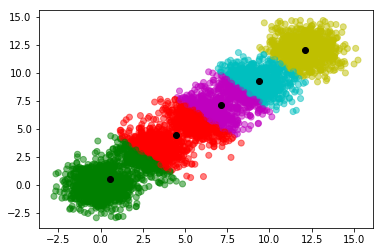

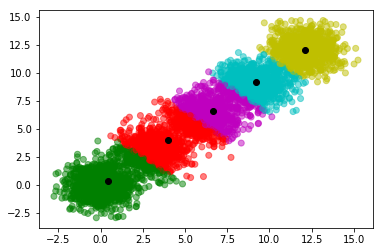

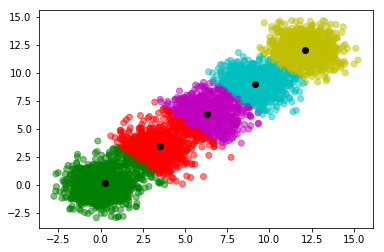

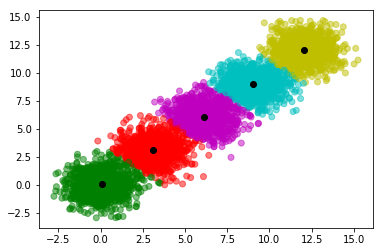

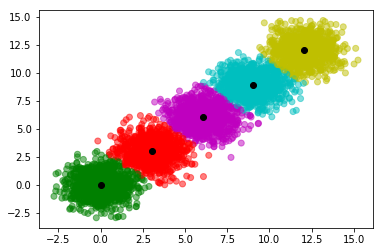

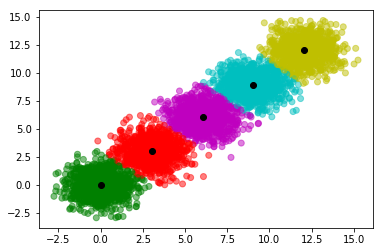

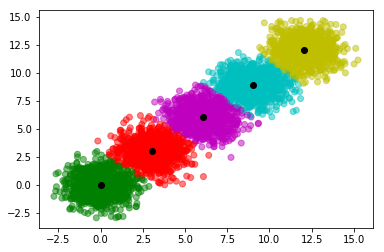

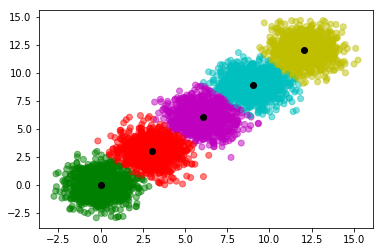

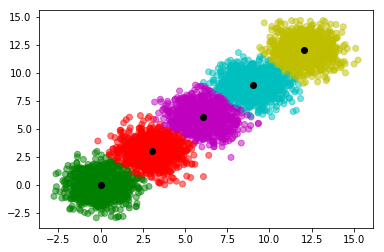

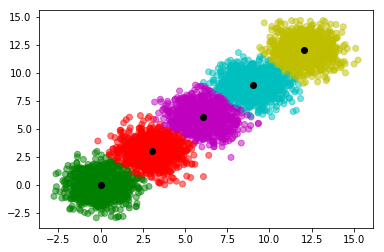

Group sizes:  [ 957 1084 1019  947  993]


In [3]:
number = 5000
dimension = 2
distributions_number = 5
probabilities = None
mi = np.array([3 * k * np.ones(dimension) for k in range(distributions_number)])
sigma = np.array([np.identity(dimension)] * distributions_number)

data = generate_data(number, dimension, distributions_number, probabilities, mi, sigma)
partition = KMeans(k=5)
while partition.partition_changed or partition.partition_changed is None:
    partition.fit(data, max_iterations=1)
    colormap = "cmyrg"
    pyplot.scatter(*data.T, c=[colormap[i] for i in partition.groups], alpha=0.5)
    pyplot.scatter(*partition.group_centers.T, c="k")
    pyplot.show()

print("Group sizes: ", partition.groups_sizes())

Group sizes:  [ 907 1032  997 1036 1028]


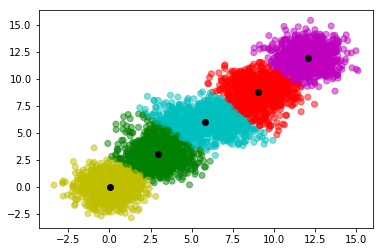

In [4]:
number = 5000
dimension = 2
distributions_number = 5
probabilities = None
mi = np.array([3 * k * np.ones(dimension) for k in range(distributions_number)])
sigma = np.array([np.identity(dimension)] * distributions_number)
sigma[2] = np.array([[3, 0], [0, 1]])
plot(number, dimension, distributions_number, probabilities, mi, sigma)

Group sizes:  [1237  825 1067  975  896]


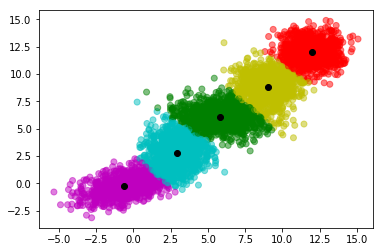

In [5]:
number = 5000
dimension = 2
distributions_number = 5
probabilities = None
mi = np.array([3 * k * np.ones(dimension) for k in range(distributions_number)])
sigma = np.array([np.identity(dimension)] * distributions_number)
sigma[2] = np.array([[3, 0], [0, 1]])
sigma[0] = np.array([[3, 1], [1, 1]])
plot(number, dimension, distributions_number, probabilities, mi, sigma)

Group sizes:  [ 695  809 1497 1268  731]


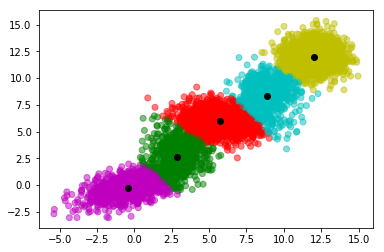

In [6]:
number = 5000
dimension = 2
distributions_number = 5
probabilities = np.array([0.2, 0.1, 0.3, 0.1, 0.3])
mi = np.array([3 * k * np.ones(dimension) for k in range(distributions_number)])
sigma = np.array([np.identity(dimension)] * distributions_number)
sigma[2] = np.array([[3, 0], [0, 1]])
sigma[0] = np.array([[3, 1], [1, 1]])
plot(number, dimension, distributions_number, probabilities, mi, sigma)

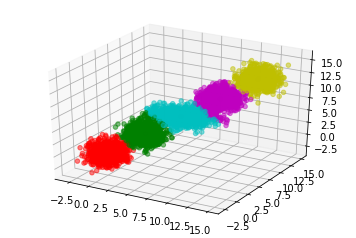

Group sizes:  [ 901 1041 1018 1001 1039]


In [7]:
number = 5000
dimension = 3
distributions_number = 5
probabilities = None
mi = np.array([3 * k * np.ones(dimension) for k in range(distributions_number)])
sigma = np.array([np.identity(dimension)] * distributions_number)
sigma[2] = np.array([[3, 1, 0], [1, 1, 0], [0, 0, 1]])

data = generate_data(number, dimension, distributions_number, probabilities, mi, sigma)
partition = KMeans(k=5).fit(data)
colormap = "cmyrg"
figure = pyplot.figure()
plot = figure.add_subplot(111, projection="3d")
plot.scatter(*data.T[:2], zs=data.T[2], c=[colormap[i] for i in partition.groups], alpha=0.5)
plot.scatter(*partition.group_centers.T[:2], 
               zs=partition.group_centers.T[2], c="k")
pyplot.show()
print("Group sizes: ", partition.groups_sizes())

In [9]:
number = 5000
dimension = 100
distributions_number = 10
probabilities = None
mi = np.array([3 * k * np.ones(dimension) for k in range(distributions_number)])
sigma = np.array([np.identity(dimension)] * distributions_number)

data = generate_data(number, dimension, distributions_number, probabilities, mi, sigma)

t0 = time.time()
partition = KMeans(k=5).fit(data)
t1 = time.time()
print("Time: ", t1-t0)
print("Average center to center distance: ", partition.center_to_center_average_distance())
print("Group sizes: ", partition.groups_sizes())

Time:  0.028586626052856445
Average center to center distance:  [  90.31306971   90.23608338  135.92541112   79.01553216  146.54374794]
Group sizes:  [1062  959  985  489 1505]
